# Tercera Actividad

## Percepción Computacional

### Información:
**Desarrollado por:** José Miguel Pereira

**Fecha de entrega:** 20 de Febrero del 2023


### Objetivo:
El objetivo de este trabajo es aprender a construir y evaluar el rendimiento de uno o más segmentadores. Esta actividad permitirá consolidar los conceptos sobre segmentación de imágenes aprendidos.

Se plantea la solución de detectar la presencia de animales dentro del campo visual de una autopista.

In [1]:
# Librerias
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import color
import cv2 

Se realiza la apreciación de la imagen original.

In [2]:
#leemos la imagen del ciervo convertimos a gris.
animal = cv2.imread("images/ciervo_1.jpg", cv2.IMREAD_COLOR)
animal = cv2.cvtColor(animal, cv2.COLOR_BGR2RGB)
animal_gray = rgb2gray(animal)

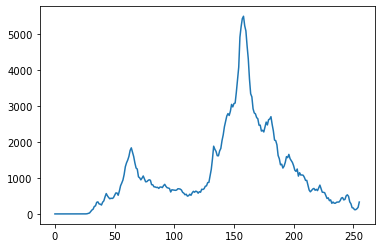

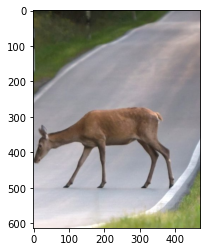

In [3]:
# Histograma e imagen original
histAnimal = cv2.calcHist([animal], [0], None, [256], [0, 256])
plt.plot(histAnimal)
normalAnimal = plt.figure()
plt.imshow(animal)

## Segmentadores:

### Umbralización

Para el segmentador se emplean 10 valores de thresholds, para poder observar el que mejor resultado genera.

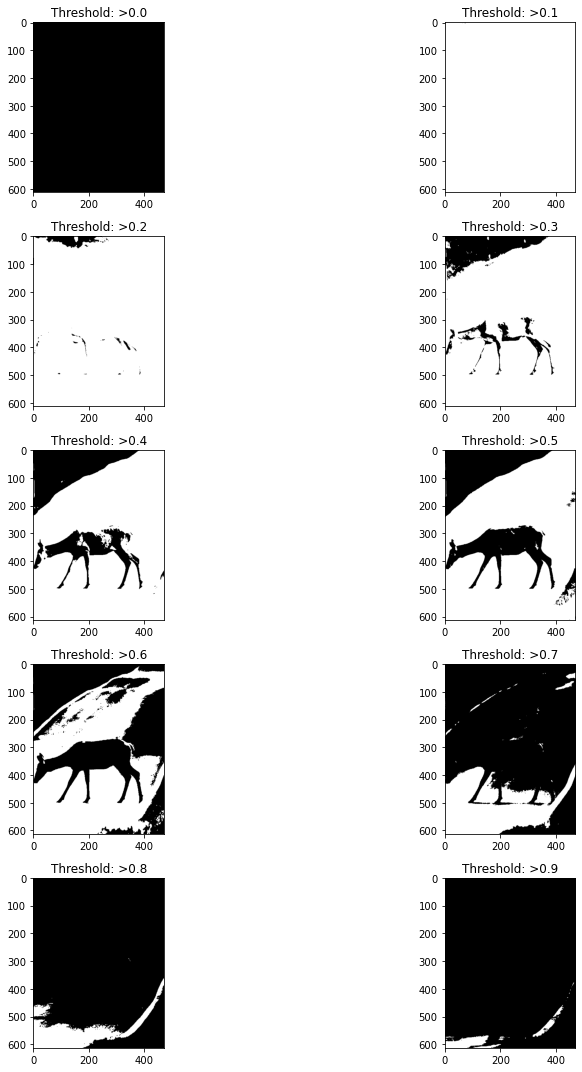

In [4]:
plt.figure(figsize=(15, 15))

for i in range(10):
   
  # Iterating different thresholds
  binarized_gray = (animal_gray > i*0.1)*1
  plt.subplot(5,2,i+1)
   
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
   
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')
   
plt.tight_layout()

El valor que mejor resultado brinda al estudio, se trata de un threshold de 0.5.

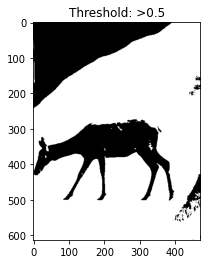

In [5]:
# Iterating different thresholds
binarized_gray = (animal_gray > 0.5)*1
plt.title("Threshold: >"+str(0.5))
plt.imshow(binarized_gray, cmap = 'gray')

### Segmentador SLIC

<ipython-input-6-e53a8b3398b4>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  slic_animal = slic(animal_gray,n_segments=1000,compactness=0.1)


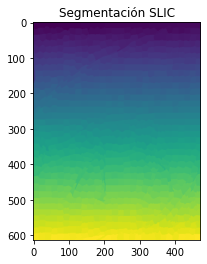

In [6]:
from skimage.segmentation import slic
slic_animal = slic(animal_gray,n_segments=1000,compactness=0.1)

plt.title("Segmentación SLIC")
plt.imshow(slic_animal)

<ipython-input-7-9f542a69f339>:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  color_slic=label2rgb(slic_animal,animal_gray,kind='avg')


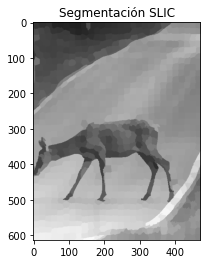

In [7]:
from skimage.color import rgb2gray,label2rgb
color_slic=label2rgb(slic_animal,animal_gray,kind='avg')
plt.title("Segmentación SLIC")
plt.imshow(color_slic)

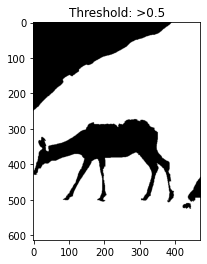

In [8]:
segmentado_slic_gray = rgb2gray(color_slic)
binarized_slic = (segmentado_slic_gray > 0.5)*1
plt.title("Threshold: >"+str(0.5))
plt.imshow(binarized_slic, cmap = 'gray')

### Segmentador Quickshift

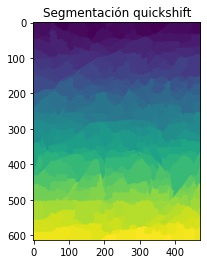

In [9]:
from skimage.segmentation import quickshift
quickshift_animal = quickshift(animal)

plt.title("Segmentación quickshift")
plt.imshow(quickshift_animal)

<ipython-input-10-aff3b9ae50ee>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  color_quickshift=label2rgb(quickshift_animal,animal_gray,kind='avg')


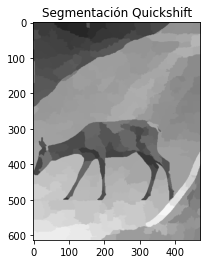

In [10]:
color_quickshift=label2rgb(quickshift_animal,animal_gray,kind='avg')
plt.title("Segmentación Quickshift")
plt.imshow(color_quickshift)

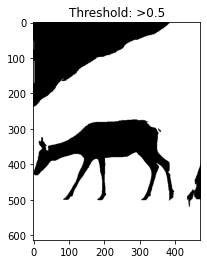

In [11]:
segmentado_quickshift_gray = rgb2gray(color_quickshift)
binarized_quickshift = (segmentado_quickshift_gray > 0.5)*1
plt.title("Threshold: >"+str(0.5))
plt.imshow(binarized_quickshift, cmap = 'gray')

### Segmentador Felzenszwlab

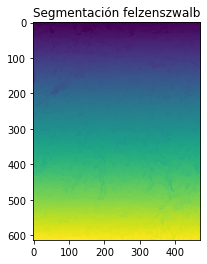

In [12]:
from skimage.segmentation import felzenszwalb

felzenszwalb_animal = felzenszwalb(animal_gray)
plt.title("Segmentación felzenszwalb")
plt.imshow(felzenszwalb_animal)

<ipython-input-13-3b1db564f19f>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  color_fb=label2rgb(felzenszwalb_animal,animal_gray,kind='avg')


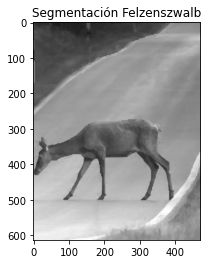

In [13]:
color_fb=label2rgb(felzenszwalb_animal,animal_gray,kind='avg')
plt.title("Segmentación Felzenszwalb")
plt.imshow(color_fb)

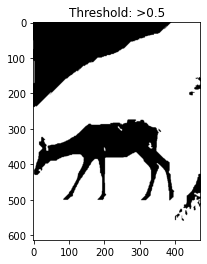

In [14]:
segmentado_fb_gray = rgb2gray(color_fb)
binarized_fb = (segmentado_fb_gray > 0.5)*1
plt.title("Threshold: >"+str(0.5))
plt.imshow(binarized_fb, cmap = 'gray')

## Comparativa

Se establece la comparación entre las máscaras generadas y la imagen Ground-Truth.

Se Generará la matriz de confusión que nos dará el resultado para poder comparar cual sería el mejor segmentador, entre los 4 empleados.

In [15]:
#leemos la imagen del ciervo convertimos a gris.
animal_GT = cv2.imread("images/ciervo_1_GT_1.jpg", cv2.IMREAD_COLOR)
animal_GT = cv2.cvtColor(animal_GT, cv2.COLOR_BGR2RGB)
animal_GT_gray = rgb2gray(animal_GT)

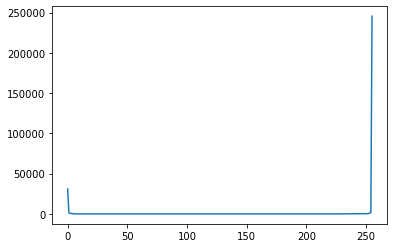

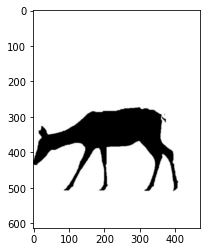

In [16]:
# Histograma e imagen original
histAnimal = cv2.calcHist([animal_GT], [0], None, [256], [0, 256])
plt.plot(histAnimal)
normalAnimal = plt.figure()
plt.imshow(animal_GT)

In [17]:
def comparar(prediction,ground_truth):
    tp, tn, fp, fn = 0,0,0,0
    for i in range(prediction.shape[0]):
            for j in range(prediction.shape[1]):
                if (prediction[i][j] == 1 and ground_truth[i][j] == 1):
                    tp+=1
                elif (prediction[i][j] == 0 and ground_truth[i][j] == 0):
                    tn+=1
                elif (prediction[i][j] == 1 and ground_truth[i][j] == 0):
                    fp+=1
                elif (prediction[i][j] == 0 and ground_truth[i][j] == 1):
                    fn+=1
    result=[tp,tn,fp,fn]
    return result

def conf_matrix(results, name):
    print(name)
    # Se extraen los diferentes elementos de la comparación que se realiza entre las dos imágenes.
    print("TP:",str(results[0]),"TN:",str(results[1]),"FP:",str(results[2]),"FN:",str(results[3]))
    # Accuracy: (TP+TN)/(TP+TN+FP+FN)
    print("Accuracy:",str((results[0]+results[1])/(results[0]+results[1]+results[2]+results[3])),"\n","\n")
    

In [18]:
conf_matrix(comparar(binarized_gray,animal_GT_gray),"Resultado del Segmentador:Umbralización")
conf_matrix(comparar(binarized_slic,animal_GT_gray),"Resultado del Segmentador:SLIC")
conf_matrix(comparar(binarized_quickshift,animal_GT_gray),"Resultado del Segmentador:Quickshift")
conf_matrix(comparar(binarized_fb,animal_GT_gray),"Resultado del Segmentador:Felzenszwalb")

Resultado del Segmentador:Umbralización
TP: 198581 TN: 27203 FP: 3640 FN: 46798
Accuracy: 0.8174004967019282 
 

Resultado del Segmentador:SLIC
TP: 199032 TN: 27259 FP: 3584 FN: 46347
Accuracy: 0.8192359768591929 
 

Resultado del Segmentador:Quickshift
TP: 200240 TN: 27855 FP: 2988 FN: 45139
Accuracy: 0.8257669555647269 
 

Resultado del Segmentador:Felzenszwalb
TP: 198901 TN: 27196 FP: 3647 FN: 46478
Accuracy: 0.818533643228997 
 



## Resultado
Todos los segmentadores renococieron el terreno superior de la vía.

En cuanto a la comparativa con el Ground-Truth, el mejor resultado se lo obtuvo mediante la segmentación realizada por Quickshift, esto es mediante el uso de la matriz de confusión.

Para tener una comparación más equitativa, los valores de threshold que se empleó fue el mismo para todos los segmentadores.